In [64]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# dash ? 
# plotly ? 

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
from graphviz import Source

from sklearn.pipeline import Pipeline, make_pipeline


## columns check 

In [75]:
combat = pd.read_csv('./combats.csv')
pokemon = pd.read_csv('./pokemon.csv')
test_df = pd.read_csv('./tests.csv')

In [76]:
pokemon_df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

# Feature Engineering

## Null 
- 'Name' 
- 'Type 2' 

In [77]:
pokemon_df.isnull().sum() 
# Name, Type2에 널값 존재 

#             0
Name          0
Type 1        0
Type 2        0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [78]:
# Name 에 있는 널값 처리하기 
# null값이 가지고 있는 속성확인 
pokemon_df.loc[pokemon_df['Name'].isnull()] 

#와.. 이걸 찾았다는게 ...  경이롭다.... 대단해.... 
pokemon_df.loc[pokemon_df['Name'].isnull(), 'Name'] = 'Primeape'
pokemon_df.iloc[62]

#                   63
Name          Primeape
Type 1        Fighting
Type 2            None
HP                  65
Attack             105
Defense             60
Sp. Atk             60
Sp. Def             70
Speed               95
Generation           1
Legendary        False
Name: 62, dtype: object

### Type 2 널값 처리

In [79]:
pokemon_df.loc[pokemon_df['Type 2'].isnull()]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


In [80]:
pokemon_df['Type 2'].value_counts(dropna = False)

None        386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Water        14
Rock         14
Ghost        14
Ice          14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [81]:
#그러게.. 타입2의 널값의 기준이 뭔지 모르니 그래서 none으로 넣어주셨군요.... 
pokemon_df.fillna(value = 'None', inplace=True)
pokemon_df.loc[pokemon_df['Type 2'].isnull()] # 널값 존재하는지 확인 --> 이제 없음 
pokemon_df['Type 2'].isnull().sum() # 널값 존재 확인 

0

## calculate the win % each pokemon 

In [82]:
# add the calculation to the pokemon datase 
total_Wins = combats_df.Winner.value_counts()

# 각 포켓몬 이긴 수 
numberOfWins = combats_df.groupby('Winner').count()

# 이게 의미하는게 정확히 뭐지.. 
countByFirst = combats_df.groupby('Second_pokemon').count()
countBySecond = combats_df.groupby('First_pokemon').count()
print("Count by first winner shape: " + str(countByFirst.shape))
print("Count by second winner shape: " + str(countBySecond.shape))
print("Total Wins shape : " + str(total_Wins.shape)) # 하나가 적음 why? 한번도 이기지 못한 포켓몬 1개 

Count by first winner shape: (784, 2)
Count by second winner shape: (784, 2)
Total Wins shape : (783,)


In [87]:
numberOfWins = numberOfWins.sort_index()
numberOfWins['Total Fights'] = countByFirst.Winner + countBySecond.Winner
numberOfWins['Win Percentage']= numberOfWins.First_pokemon/numberOfWins['Total Fights']

# merge the winning dataset and the original pokemon dataset
results2 = pd.merge(pokemon, numberOfWins, right_index = True, left_on='Number')
results3 = pd.merge(pokemon, numberOfWins, left_on='Number', right_index = True, how='left')

# We can look at the difference between the two datasets to see which pokemon never recorded a fight
#missing_Pokemon = np.setdiff1d(pokemon.index.values, results3.index.values)
#subset the dataframe where pokemon win percent is NaN
results3[results3['Win Percentage'].isnull()]

KeyError: 'Number'

In [85]:
import matplotlib.pyplot as plt
#f, (ax1, ax2) = plt.subplots(1,2)
sns.regplot(x="Speed", y="Win Percentage", data=results3, logistic=True).set_title("Speed vs Win Percentage")
sns.lmplot(x="Speed", y="Win Percentage", data=results3, hue = 'Type 1',  logistic=True)#.set_title("Speed vs Win Percentage")

NameError: name 'results3' is not defined

In [ ]:
results3[np.isfinite(results3['Win Percentage'])].sort_values(by = ['Win Percentage']).head(10)

In [ ]:
# 타입1의 승률 
result3.groubpy('Type 1').agg({'Win percentage :' : 'mean'}).sort_values(by = 'Win Percentage')

In [89]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt # data visualization
#import matplotlib.pyplot as plt
import seaborn as sns #data visualization
import random 

random.seed(1)
# Import the dataset
pokemon = pd.read_csv("./pokemon.csv")
# rename the column with a pound sign/hashtag as "number" its name
# The reason for this is when  we try and access this column later it will comment out the code
pokemon = pokemon.rename(index=str, columns={"#": "Number"})
combat = pd.read_csv("./combats.csv")
pokemon.head()

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [90]:
print("Dimenstions of Pokemon: " + str(pokemon.shape))
print("Dimenstions of Combat: " + str(combat.shape))

Dimenstions of Pokemon: (800, 12)
Dimenstions of Combat: (50000, 3)


In [91]:
pokemon.isnull().sum()

Number          0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [92]:
combat.isnull().sum()

First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64

In [93]:
# 이름이 널값이 애 확인 
print("This pokemon is before the missing Pokemon: " + pokemon['Name'][61])
print(pokemon[pokemon['Name'].isnull()])

print("This pokemon is after the missing Pokemon: " + pokemon['Name'][63])

This pokemon is before the missing Pokemon: Mankey
    Number Name    Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
62      63  NaN  Fighting    NaN  65     105       60       60       70   

    Speed  Generation  Legendary  
62     95           1      False  
This pokemon is after the missing Pokemon: Growlithe


In [95]:
# 속성확인해서 포켓몬이름 넣어줌 
pokemon['Name'][62] = "Primeape" 

<ipython-input-95-af5ca98832cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon['Name'][62] = "Primeape"


In [97]:
pokemon.iloc[62]

Number              63
Name          Primeape
Type 1        Fighting
Type 2             NaN
HP                  65
Attack             105
Defense             60
Sp. Atk             60
Sp. Def             70
Speed               95
Generation           1
Legendary        False
Name: 62, dtype: object

In [98]:
# calculate the win % of each pokemon 
# add the calculation to the pokemon dataset 
total_Wins = combat.Winner.value_counts()
# get the number of wins for each pokemon
numberOfWins = combat.groupby('Winner').count()

#both methods produce the same results
countByFirst = combat.groupby('Second_pokemon').count()
countBySecond = combat.groupby('First_pokemon').count()
print("Looking at the dimensions of our dataframes")
print("Count by first winner shape: " + str(countByFirst.shape))
print("Count by second winner shape: " + str(countBySecond.shape))
print("Total Wins shape : " + str(total_Wins.shape)) # 모양 하나가 없음 --> 한번도 이기지 못한 포켓몬1마리 있음 

Looking at the dimensions of our dataframes
Count by first winner shape: (784, 2)
Count by second winner shape: (784, 2)
Total Wins shape : (783,)


In [99]:
# 한번도 이기지 못한 포켓몬은 어떤 포켓몬인가? 
find_losing_pokemon= np.setdiff1d(countByFirst.index.values, numberOfWins.index.values)-1 #offset because the index and number are off by one
losing_pokemon = pokemon.iloc[find_losing_pokemon[0],]
print(losing_pokemon) # 방어력은 높은 편이나 승률은 낮음 --> 방어력은 승패에 큰 영향일 미치지 않음 

Number            231
Name          Shuckle
Type 1            Bug
Type 2           Rock
HP                 20
Attack             10
Defense           230
Sp. Atk            10
Sp. Def           230
Speed               5
Generation          2
Legendary       False
Name: 230, dtype: object


In [100]:
# 승률열을 만들어 이길수 확률에 대해서 이야기 해보자 
numberOfWins = numberOfWins.sort_index()
numberOfWins['Total Fights'] = countByFirst.Winner + countBySecond.Winner
numberOfWins['Win Percentage']= numberOfWins.First_pokemon/numberOfWins['Total Fights']

# merge the winning dataset and the original pokemon dataset
results2 = pd.merge(pokemon, numberOfWins, right_index = True, left_on='Number')
results3 = pd.merge(pokemon, numberOfWins, left_on='Number', right_index = True, how='left')

# We can look at the difference between the two datasets to see which pokemon never recorded a fight
#missing_Pokemon = np.setdiff1d(pokemon.index.values, results3.index.values)
#subset the dataframe where pokemon win percent is NaN
results3[results3['Win Percentage'].isnull()]

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,1,False,NaN,NaN,NaN,NaN
32,33,Sandshrew,Ground,NaN,50,75,85,20,30,40,1,False,NaN,NaN,NaN,NaN
45,46,Wigglytuff,Normal,Fairy,140,70,45,85,50,45,1,False,NaN,NaN,NaN,NaN
65,66,Poliwag,Water,NaN,40,50,40,40,40,90,1,False,NaN,NaN,NaN,NaN
77,78,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False,NaN,NaN,NaN,NaN
89,90,Magneton,Electric,Steel,50,60,95,120,70,70,1,False,NaN,NaN,NaN,NaN
143,144,Ditto,Normal,NaN,48,48,48,48,48,48,1,False,NaN,NaN,NaN,NaN
182,183,Ariados,Bug,Poison,70,90,70,60,60,40,2,False,NaN,NaN,NaN,NaN
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,NaN,NaN,NaN,NaN
235,236,Ursaring,Normal,NaN,90,130,75,75,75,55,2,False,NaN,NaN,NaN,NaN


In [101]:
# 승률 하위 10마리 포켓몬 확인 
results3[np.isfinite(results3['Win Percentage'])].sort_values(by = ['Win Percentage']).head(10)

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
289,290,Silcoon,Bug,NaN,50,35,55,25,25,15,3,False,3.0,3.0,138.0,0.021739
189,190,Togepi,Fairy,NaN,35,20,65,40,65,20,2,False,3.0,3.0,122.0,0.024590
638,639,Solosis,Psychic,NaN,45,30,40,105,50,20,5,False,4.0,4.0,129.0,0.031008
236,237,Slugma,Fire,NaN,40,40,40,70,40,20,2,False,4.0,4.0,123.0,0.032520
576,577,Munna,Psychic,NaN,76,25,45,67,55,24,5,False,5.0,5.0,128.0,0.039062
188,189,Igglybuff,Normal,Fairy,90,30,15,40,20,15,2,False,5.0,5.0,115.0,0.043478
394,395,Wynaut,Psychic,NaN,95,23,48,23,48,23,3,False,6.0,6.0,130.0,0.046154
209,210,Wooper,Water,Ground,55,45,45,25,25,15,2,False,6.0,6.0,125.0,0.048000
291,292,Cascoon,Bug,NaN,50,35,55,25,25,15,3,False,7.0,7.0,133.0,0.052632
752,753,Spritzee,Fairy,NaN,78,52,60,63,65,23,6,False,8.0,8.0,133.0,0.060150


,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,37.0,37.0,133.0,0.278195
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,46.0,46.0,121.0,0.380165
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,89.0,89.0,132.0,0.674242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,70.0,70.0,125.0,0.560000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,55.0,55.0,112.0,0.491071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,39.0,39.0,105.0,0.371429
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,116.0,116.0,131.0,0.885496
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,60.0,60.0,119.0,0.504202
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,89.0,89.0,144.0,0.618056


In [102]:
# 승률 상위 10마리 포켓몬 확인 
results3[np.isfinite(results3['Win Percentage'])].sort_values(by = ['Win Percentage'], ascending = False ).head(10)

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,1,False,127.0,127.0,129.0,0.984496
512,513,Weavile,Dark,Ice,70,120,65,45,85,125,4,False,116.0,116.0,119.0,0.974790
703,704,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,5,True,121.0,121.0,125.0,0.968000
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,115.0,115.0,119.0,0.966387
153,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,1,False,136.0,136.0,141.0,0.964539
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,4,False,124.0,124.0,129.0,0.961240
726,727,Greninja,Water,Dark,72,95,67,103,71,122,6,False,122.0,122.0,127.0,0.960630
716,717,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,5,False,118.0,118.0,123.0,0.959350
164,165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True,119.0,119.0,125.0,0.952000
349,350,Mega Sharpedo,Water,Dark,70,140,70,110,65,105,3,False,114.0,114.0,120.0,0.950000


- 눈으로 보기에도 차이점은 타입2도 있고 , 공격력, 스피드 , 
- 전설의 포켓몬이 간간히 보이긴하네 상위 10개2중에 2개면.. 흠.. 

In [103]:
results3.describe()

,Number,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,First_pokemon,Second_pokemon,Total Fights,Win Percentage
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,783.000000,783.000000,783.000000,783.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,63.856960,63.856960,127.541507,0.501538
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,32.925941,32.925941,11.397402,0.254993
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,3.000000,3.000000,92.000000,0.021739
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,36.000000,36.000000,120.000000,0.284228
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,62.000000,62.000000,128.000000,0.491071
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,91.000000,91.000000,135.000000,0.717644
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,152.000000,152.000000,164.000000,0.984496


Text(0.5, 1.0, 'Total Pokemon by Type 1')

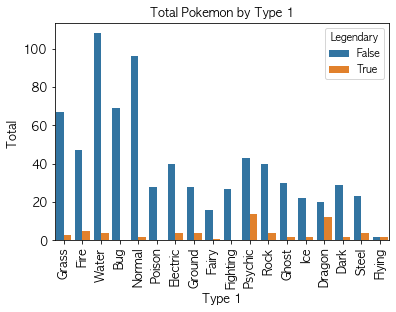

In [104]:
import matplotlib.pyplot as plt
sns.set_color_codes("pastel")
ax = sns.countplot(x="Type 1", hue="Legendary", data=results3)
#f.set_xticklabels(rotation=30)
plt.xticks(rotation= 90)
plt.xlabel('Type 1')
plt.ylabel('Total ')
plt.title("Total Pokemon by Type 1")

In [106]:
results3.groupby('Type 1').agg({"Win Percentage": "mean"}).sort_values(by = "Win Percentage", ascending = False)

,Win Percentage
Type 1,
Flying,0.765061
Dragon,0.633587
Electric,0.632861
Dark,0.629726
Fire,0.579215
Psychic,0.545747
Ground,0.541526
Normal,0.535578
Ghost,0.484027


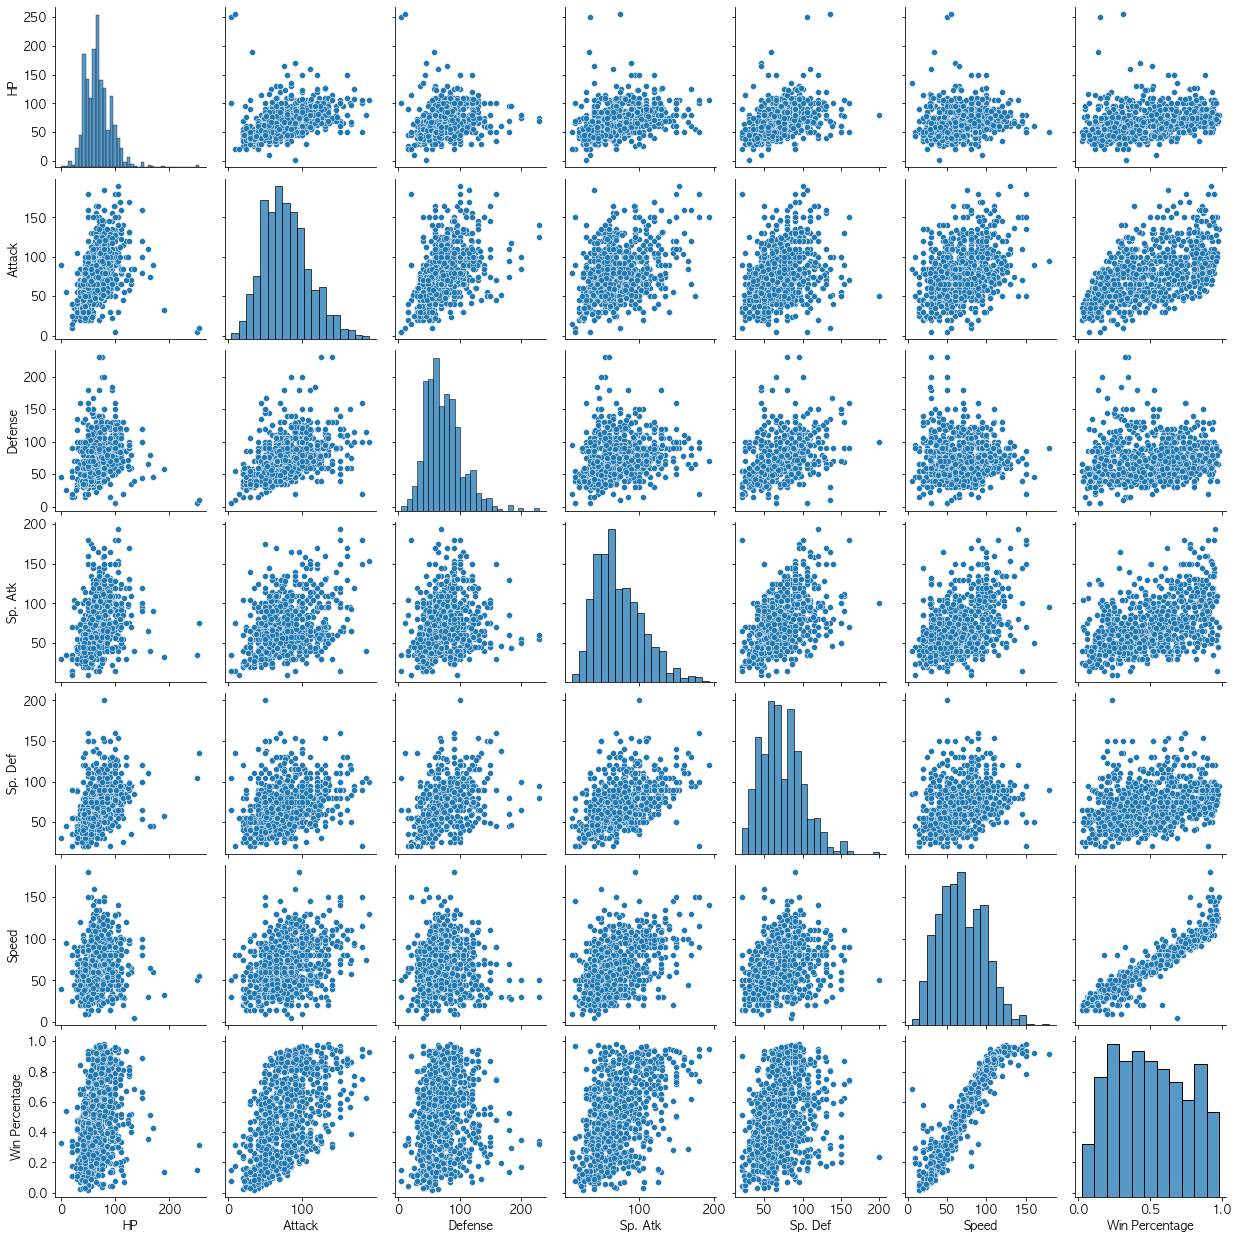

In [107]:
#sns.distplot(results3["Win Percentage"].dropna(), bins=20)
col = ['Type 1','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win Percentage']
#results3.loc[:,'HP':'Speed'].corr()
sns.pairplot(results3.loc[:,col].dropna())

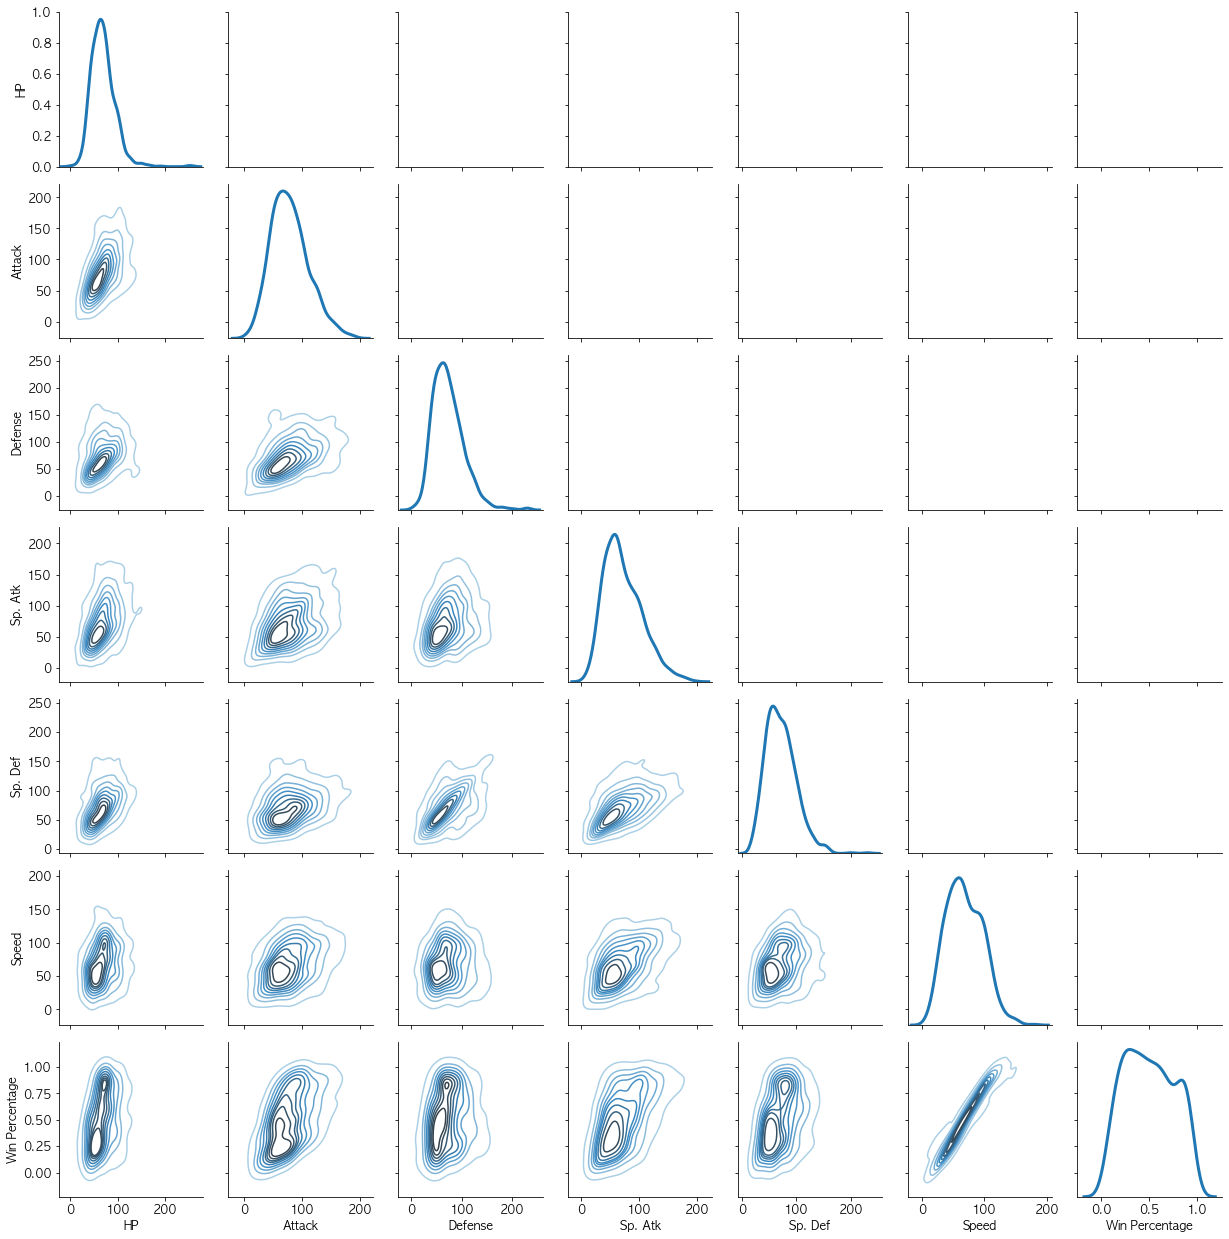

In [108]:
import matplotlib.pyplot as plt

g = sns.PairGrid(results3.loc[:,col], diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw=3)


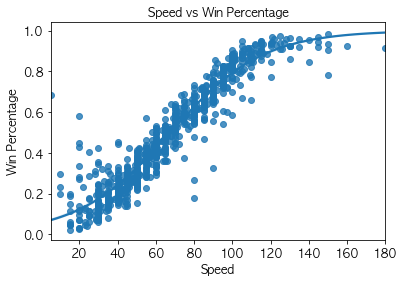

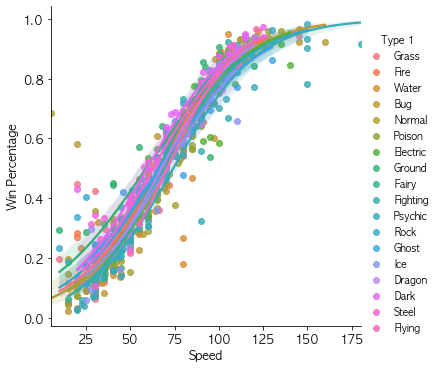

In [109]:
import matplotlib.pyplot as plt
#f, (ax1, ax2) = plt.subplots(1,2)
sns.regplot(x="Speed", y="Win Percentage", data=results3, logistic=True).set_title("Speed vs Win Percentage")
sns.lmplot(x="Speed", y="Win Percentage", data=results3, hue = 'Type 1',  logistic=True)#.set_title("Speed vs Win Percentage")

In [112]:
pokemon[pokemon['Name'] == 'Pikachu']

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
30,31,Pikachu,Electric,NaN,35,55,40,50,50,90,1,False


In [122]:
# 피카츄 승률 
results3[results3['Name'] == 'Pikachu']['Win Percentage'] # 승률 0.683824


30    0.683824
Name: Win Percentage, dtype: float64

In [120]:
np.mean(results3)['Win Percentage'] # 평균 승률 0.50 

0.5015382890806809